# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rama Aulia Gemilang
- **Email:** ramarama792@gmail.com
- **ID Dicoding:** gemilangrama

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 (Bagaimana persebaran banyaknya sepeda yang disewa perbulan?)
- Pertanyaan 2 (Bagaimana pengaruh musim (season) terhadap sepeda yang disewa?)
- Pertanyaan 3 (Bagaimana cuaca mempengaruhi sepeda yang disewa?)
- Pertanyaan 4 (Berapa rata-rata jumlah sepeda yang disewa setiap jam (hr)?)

## Import Semua Packages/Library yang Digunakan

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Akses file dari direktori data

In [ ]:
file1 = "data/day.csv"
file2 = "data/hour.csv"

Read dataset day

In [89]:
day_df = pd.read_csv(file1)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Read dataset hour


In [90]:
hour_df = pd.read_csv(file2)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel day_df

In [91]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [92]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [93]:
print("Jumlah data duplikat pada day_df: ", day_df.duplicated().sum())

Jumlah data duplikat pada day_df:  0


In [94]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [95]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [96]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [97]:
print("Jumlah data duplikat pada hour_df: ", hour_df.duplicated().sum())

Jumlah data duplikat pada hour_df:  0


In [98]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Dikarenakan pada kedua dataframe tidak ada missing value dan duplikasi data jadi pada bagian ini hanya akan untuk bagian kerapihan data saja.

Ubah keterangan kolom day_df

In [99]:
# Ubah data day_df kategorial menjadi object untuk mempermudah tahapan visualisasi

# season : season (1:springer, 2:summer, 3:fall, 4:winter)
day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# yr : year (0: 2011, 1:2012)
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# weathersit : (1: Clear, 2: Mist, 3: Light Rain / Snow, 4: Heavy Rain)
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Rain / Snow','Heavy Rain'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
day_df.workingday.replace((0,1), (False, True), inplace=True)

In [100]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,6,False,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,1,0,0,False,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,1,0,1,True,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,2011,1,0,2,True,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,2011,1,0,3,True,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [101]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    object 
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    bool   
 8   weathersit  731 non-null    object 
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: bool(1), float64(4), int64(8), object(3)
memory usage: 86.5+ KB


Ubah keterangan kolom hour_df

In [102]:
# Ubah data kategorial menjadi object untuk mempermudah tahapan visualisasi

# season : season (1:springer, 2:summer, 3:fall, 4:winter)
hour_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# yr : year (0: 2011, 1:2012)
hour_df.yr.replace((0,1), (2011,2012), inplace=True)

# weathersit : (1: Clear, 2: Mist, 3: Light Rain / Snow, 4: Heavy Rain)
hour_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light Rain / Snow','Heavy Rain'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
hour_df.workingday.replace((0,1), (False, True), inplace=True)

In [103]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,1,0,0,6,False,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,0,6,False,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,0,6,False,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,0,6,False,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,0,6,False,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [104]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  bool   
 9   weathersit  17379 non-null  object 
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: bool(1), float64(4), int64(9), object(3)
memory usage: 2.1+ MB


Menggabungkan kedua data berdasarkan dteday

In [105]:
all_data_df = hour_df.merge(day_df, on='dteday', how='inner', suffixes=('_hour', '_day'))

## Exploratory Data Analysis (EDA)

Eksplorasi day_df

In [106]:
# summary statistik semua data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Summer,NaN,NaN,NaN,NaN,True,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,6.519836,0.028728,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,2.004787,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,1.000000,0.000000,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,4.000000,0.000000,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,2012.000000,7.000000,0.000000,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,2012.000000,10.000000,0.000000,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [107]:
# jumlah penyewaan sepeda berdasarkan hari
jumlah_cnt_dteday = day_df.groupby('weekday')['cnt'].sum().sort_values(ascending=False)
print(jumlah_cnt_dteday)

weekday
5    487790
4    485395
6    477807
3    473048
2    469109
1    455503
0    444027
Name: cnt, dtype: int64


In [108]:
# jumlah penyewaan sepeda berdasarkan hari kerja (working day)
jumlah_cnt_workingday = day_df.groupby('workingday')['cnt'].sum().sort_values(ascending=False)
print(jumlah_cnt_workingday)

workingday
True     2292410
False    1000269
Name: cnt, dtype: int64


In [109]:
# jumlah penyewaan sepeda berdasarkan hari libur (holiday)
jumlah_cnt_holiday = day_df.groupby('holiday')['cnt'].sum().sort_values(ascending=False)
print(jumlah_cnt_holiday)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64


In [110]:
# Menghitung rata-rata temperatur per hari
ratarata_temp_per_day = day_df.groupby('dteday')['temp'].mean().sort_values(ascending=False)
print(ratarata_temp_per_day)

dteday
2012-07-07    0.861667
2011-07-23    0.849167
2011-07-22    0.848333
2011-07-29    0.838333
2012-06-29    0.834167
                ...   
2012-02-12    0.127500
2012-01-04    0.107500
2011-01-24    0.097391
2011-01-23    0.096522
2011-01-22    0.059130
Name: temp, Length: 731, dtype: float64


In [111]:
# demografi pelanggan (casual dan registered) berdasarkan season
demografi_season = day_df.groupby('season').agg({'casual': 'sum','registered': 'sum'})
print(demografi_season)

        casual  registered
season                    
Fall    129782      711831
Spring  203522      715067
Summer  226091      835038
Winter   60622      410726


Eksplorasi hour_df

In [112]:
# summary statistik semua data hour_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Summer,NaN,NaN,NaN,NaN,NaN,True,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,NaN,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,6.537775,11.546752,0.028770,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,0.167165,2.005771,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,4.000000,6.000000,0.000000,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,NaN,2012.000000,7.000000,12.000000,0.000000,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,NaN,2012.000000,10.000000,18.000000,0.000000,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [113]:
# jumlah penyewaan sepeda setiap jam
jumlah_cnt_hr = hour_df.groupby('hr')['cnt'].sum().sort_values(ascending=False)
print(jumlah_cnt_hr)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64


In [114]:
# Rata-rata temperatur per jam
ratarata_temp_per_hour = hour_df.groupby('hr')['temp'].mean().sort_values(ascending=False)
print(ratarata_temp_per_hour)

hr
15    0.568615
14    0.565075
16    0.564959
13    0.554733
17    0.554575
18    0.541181
12    0.540275
19    0.524176
11    0.522613
20    0.508599
10    0.500578
21    0.495302
22    0.484505
9     0.476726
23    0.475027
0     0.467410
1     0.459365
8     0.454993
2     0.454573
3     0.453113
4     0.446628
7     0.439092
5     0.436123
6     0.432469
Name: temp, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana persebaran banyaknya sepeda yang disewa perbulan?

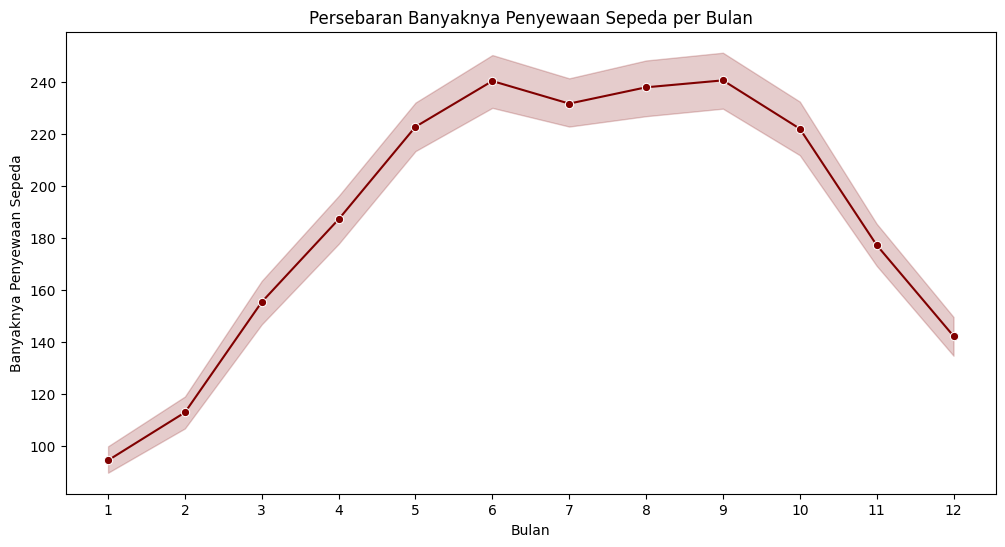

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth_hour', y='cnt_hour', color="maroon", marker="o", data=all_data_df)
plt.xticks(range(1, 13))
plt.title('Persebaran Banyaknya Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Banyaknya Penyewaan Sepeda')
plt.show()

### Pertanyaan 2: Bagaimana pengaruh musim (season) terhadap sepeda yang disewa?

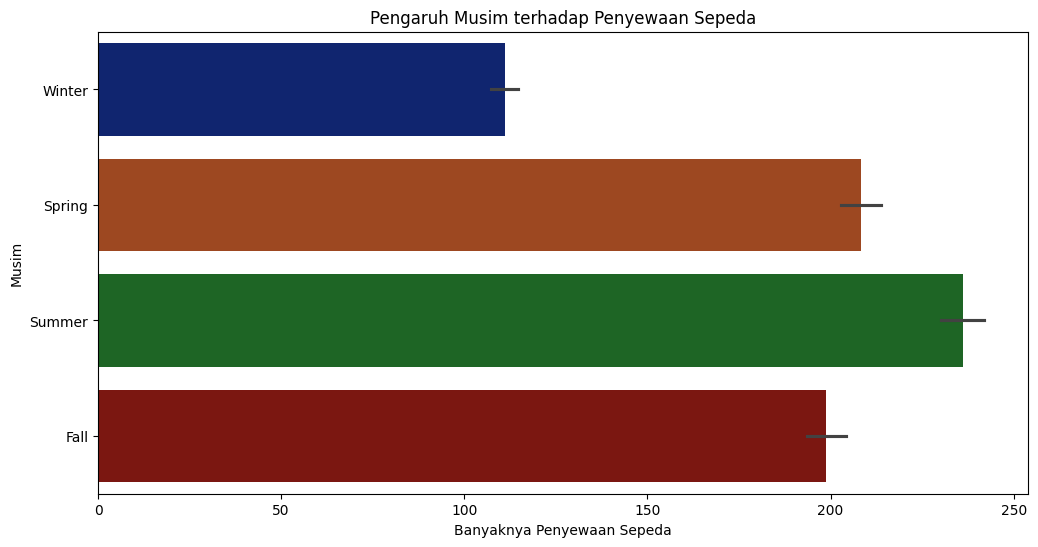

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cnt_hour', y='season_hour', hue="season_hour", palette='dark', data=all_data_df)
plt.title('Pengaruh Musim terhadap Penyewaan Sepeda')
plt.xlabel('Banyaknya Penyewaan Sepeda')
plt.ylabel('Musim')
plt.show()

### Pertanyaan 3: Bagaimana cuaca mempengaruhi sepeda yang disewa?


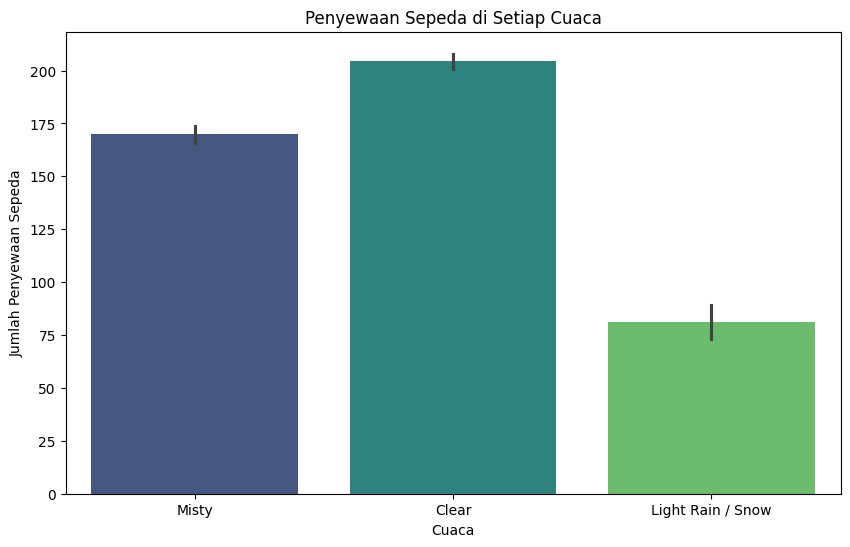

In [117]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_day', y='cnt_hour', hue="weathersit_day", palette="viridis", data=all_data_df)
plt.title('Penyewaan Sepeda di Setiap Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 4: Berapa rata-rata jumlah sepeda yang disewa setiap jam (hr)?

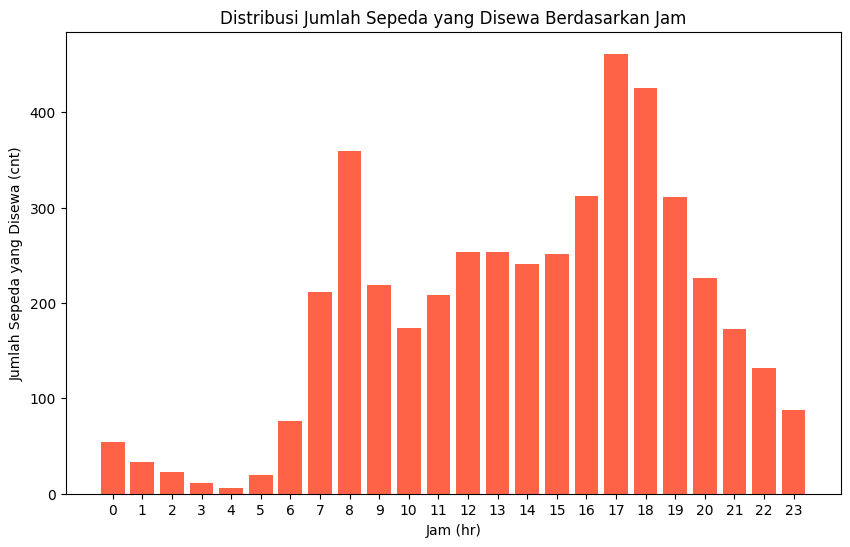

In [118]:
ratarata = all_data_df.groupby('hr')['cnt_hour'].mean()
plt.figure(figsize=(10, 6))
plt.bar(ratarata.index, ratarata.values, color='tomato')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Sepeda yang Disewa (cnt)')
plt.xticks(range(0,24))
plt.title('Distribusi Jumlah Sepeda yang Disewa Berdasarkan Jam')
plt.show()

## Conclusion

- Conclution Pertanyaan 1: Bagaimana persebaran banyaknya sepeda yang disewa perbulan?

Berdasarkan grafik lineplot dapat ditarik kesimpulan bahwa sepeda yang disewa paling besar terdapat di bulan 6 (Juni), 8 (Agustus), dan bulan 9 (September) serta mengalami tren kenaikan mulai bulan 1 (Januari) sampai bulan 6 (Juni) serta mengalami tren penurunan mulai bulan 9 (September) sampai bulan 12 (Desember).

- Conclution Pertanyaan 2: Bagaimana pengaruh musim (season) terhadap sepeda yang disewa?

Berdasarkan grafik barplot dapat ditarik kesimpulan bahwa sepeda yang disewa paling banyak saat musim summer dan paling sedikit saat musim winter. Hal ini berkaitan dengan visualisasi pada grafik 1 dimana pada grafik tersebut mengalami tren kenaikan mulai bulan 1 (Januari) sampai bulan 6 (Juni) dimana pada bulan tersebut merupakan musim summer dan mengalami tren penurunan mulai bulan 9 (September) sampai bulan 12 (Desember) dimana pada bulan tersebut merupakan musim winter.

- Conclution Pertanyaan 3: Bagaimana cuaca mempengaruhi sepeda yang disewa?

Berdasarkan grafik barplot dapat ditarik kesimpulan bahwa sepeda yang disewa paling banyak saat cuaca clear dan paling sedikit saat light rain / snow serta saat cuaca heavy rain tidak ada persewaan sama sekali (karena pada barplot tidak tertera cuaca ini). Hal ini disebabkan karena pada cuaca clear tentunya lebih mudah untuk menggunakan sepeda sehingga orang-orang lebih banyak menyewanya sedangkan pada cuaca light rain / snow dan cuaca lainnya mungkin orang-orang lebih memilih transportasi lain yang lebih aman untuk memudahkan perjalanan.

- Conclution Pertanyaan 4: Berapa rata-rata jumlah sepeda yang disewa setiap jam (hr)?

Berdasarkan grafik barplot dapat ditarik kesimpulan bahwa rata-rata jumlah sepeda yang disewa paling banyak di jam 17 kemudian disusul oleh jam 18 dan 8. Hal ini kemungkinan disebabkan pada jam 17 dan 18 merupakan jam kebanyakan orang mengakhiri aktivitas diluar rumah dan melakukan perjalanan untuk pulang ke tempat masing-masing. Sedangkan pada jam 8 juga mengalami tren kenaikan yang cukup signifikan karena pada jam tersebut kemungkinan besar banyak orang untuk menyewa sepeda demi sebagai sarana transportasi untuk menuju tempat kegiatannya masing-masing.
Selanjutnya jumlah sepeda yang disewa paling sedikit saat di jam 0-5 tentunya hal ini disebabkan karena di jam-jam tersebut merupakan jam istirahat (dini hari).